# Proyek Analisis Data: Air Quality Analysis

1. **Nama:** Jim Jauhary Muhammad
2. **Email:** jauharyary8@gmail.com
3. **ID Dicoding:** _mijim_aja_


## Menentukan Pertanyaan Bisnis

1. Berapa persentase kualitas udara secara keseluruhan dan secara polutan berdasarkan tingkat bahaya?
2. Stasiun mana yang paling banyak terkena dampak polusi?
3. Bagaimana konsentrasi polusi udara pada waktu tertentu (Pagi, Siang, Malam)?
4. Bagaimana perubahan konsentrasi polusi udara dari waktu ke waktu (tahun dan bulan)?
5. Berapa konsentrasi curah hujan yang terjadi pada setiap tahun? Di bulan apa hujan sering terjadi?
6. Bagaimana pengaruh arah dan kecepatan angin terhadap polusi udara?


## Import Semua Packages/Library yang Digunakan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob

warnings.simplefilter("ignore")

## Data Wrangling


### Gathering Data


Dataset Air Quality dikumpulkan secara terpisah berdasarkan station. Maka dari itu, kita perlu menggabungkan kesebelas dataset menjadi satu. Pada case ini, saya akan menggabungkan dataset dengan bantuan package **glob**


In [2]:
folder_path = "Data/PRSA_Data_20130301-20170228/*.csv"
df = pd.concat([pd.read_csv(file) for file in glob.glob(folder_path)])

In [3]:
print("Ukuran Dataset:", df.shape)
df.tail()

Ukuran Dataset: (420768, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [4]:
df.reset_index(inplace=True)

In [5]:
print("Ukuran Dataset:", df.shape)
df.tail()

Ukuran Dataset: (420768, 19)


,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


Seperti yang terlihat, semua dataset sudah digabung menjadi satu menghadirkan lokasi station yang berbeda-beda. Ukuran dataset menjadi (420768, 19) yang artinya dataset memiliki 420768 record data dengan 19 fitur/kolom.


### Data Assessing


In [6]:
## Dataset Features Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    420768 non-null  int64  
 1   No       420768 non-null  int64  
 2   year     420768 non-null  int64  
 3   month    420768 non-null  int64  
 4   day      420768 non-null  int64  
 5   hour     420768 non-null  int64  
 6   PM2.5    412029 non-null  float64
 7   PM10     414319 non-null  float64
 8   SO2      411747 non-null  float64
 9   NO2      408652 non-null  float64
 10  CO       400067 non-null  float64
 11  O3       407491 non-null  float64
 12  TEMP     420370 non-null  float64
 13  PRES     420375 non-null  float64
 14  DEWP     420365 non-null  float64
 15  RAIN     420378 non-null  float64
 16  wd       418946 non-null  object 
 17  WSPM     420450 non-null  float64
 18  station  420768 non-null  object 
dtypes: float64(11), int64(6), object(2)
memory usage: 61.0+ MB


In [7]:
## Descriptive Statistics
df.describe(exclude="object")

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17531.500000,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,0.000000,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8765.750000,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17531.500000,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26297.250000,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35063.000000,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Dari hasil describe di atas, pada kolom numeric terdapat banyak nilai maksimum yang jauh melampaui nilai kuartil ketiga (Q3). Hal ini mengindikasikan bahwa terdapat outlier pada kolom-kolom tersebut


In [8]:
df.describe(include="object")

,wd,station
count,418946,420768
unique,16,12
top,NE,Aotizhongxin
freq,43335,35064


Pada hasil describe bersifat object, tidak ada keanehan yang terjadi pada kolom yang bersifat kategorikal. Berhubung kolom kategorikal pada dataset hanya berjumlah dua saja.


### Data Cleaning


In [9]:
## Menghilangkan kolom yang useless
df_cleaned = df.drop(["No"], axis=1)
df_cleaned.columns

Index(['index', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [10]:
## Handling Missing Value
df.isnull().sum().sort_values(ascending=False)

CO         20701
O3         13277
NO2        12116
SO2         9021
PM2.5       8739
PM10        6449
wd          1822
DEWP         403
TEMP         398
PRES         393
RAIN         390
WSPM         318
index          0
No             0
hour           0
day            0
month          0
year           0
station        0
dtype: int64

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

median_imputed_feats = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]
mean_imputed_feats = ["TEMP", "PRES", "DEWP"]
mode_imputed_feats = ["wd"]

mean_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

median_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

mode_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("mean", mean_transformer, mean_imputed_feats),
        ("median", median_transformer, median_imputed_feats),
        ("mode", mode_transformer, mode_imputed_feats),
    ]
)

impute_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

imputed_df = pd.DataFrame(
    data=impute_pipeline.fit_transform(df_cleaned),
    columns=impute_pipeline.get_feature_names_out(),
)

Pipeline di atas merupakan pipeline yang berfungsi untuk mengisi nilai null dengan nilai berbasis metode statistik (mean, median, modus).

- Kolom yang diisi oleh **mean** merupakan kolom yang tidak memiliki outlier dan memiliki distribusi yang cukup baik.
- Kolom yang diisi **median** merupakan kolom yang memiliki banyak outlier dan distribusinya cenderung _right-skewed_.
- Kolom yang diisi **mode** merupakan kolom kategorikal.


In [12]:
imputed_df.head(5)

,mean__TEMP,mean__PRES,mean__DEWP,median__PM2.5,median__PM10,median__SO2,median__NO2,median__CO,median__O3,median__RAIN,median__WSPM,mode__wd
0,-0.7,1023.0,-18.8,4.0,4.0,4.0,7.0,300.0,77.0,0.0,4.4,NNW
1,-1.1,1023.2,-18.2,8.0,8.0,4.0,7.0,300.0,77.0,0.0,4.7,N
2,-1.1,1023.5,-18.2,7.0,7.0,5.0,10.0,300.0,73.0,0.0,5.6,NNW
3,-1.4,1024.5,-19.4,6.0,6.0,11.0,11.0,300.0,72.0,0.0,3.1,NW
4,-2.0,1025.2,-19.5,3.0,3.0,12.0,12.0,300.0,72.0,0.0,2.0,N


In [13]:
features = [col.split("__")[1] for col in imputed_df.columns]
imputed_df.columns = features

df_cleaned = pd.concat([df_cleaned.drop(features, axis=1), imputed_df], axis=1)

In [14]:
df_cleaned.head()

,index,year,month,day,hour,station,TEMP,PRES,DEWP,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,wd
0,0,2013,3,1,0,Aotizhongxin,-0.7,1023.0,-18.8,4.0,4.0,4.0,7.0,300.0,77.0,0.0,4.4,NNW
1,1,2013,3,1,1,Aotizhongxin,-1.1,1023.2,-18.2,8.0,8.0,4.0,7.0,300.0,77.0,0.0,4.7,N
2,2,2013,3,1,2,Aotizhongxin,-1.1,1023.5,-18.2,7.0,7.0,5.0,10.0,300.0,73.0,0.0,5.6,NNW
3,3,2013,3,1,3,Aotizhongxin,-1.4,1024.5,-19.4,6.0,6.0,11.0,11.0,300.0,72.0,0.0,3.1,NW
4,4,2013,3,1,4,Aotizhongxin,-2.0,1025.2,-19.5,3.0,3.0,12.0,12.0,300.0,72.0,0.0,2.0,N


In [15]:
df_cleaned.isnull().sum().sort_values(ascending=False)

index      0
year       0
WSPM       0
RAIN       0
O3         0
CO         0
NO2        0
SO2        0
PM10       0
PM2.5      0
DEWP       0
PRES       0
TEMP       0
station    0
hour       0
day        0
month      0
wd         0
dtype: int64

In [16]:
## Handling Duplicated Data
df_cleaned[df_cleaned.duplicated()]

,index,year,month,day,hour,station,TEMP,PRES,DEWP,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,wd


Tidak ada data duplikat pada dataset


In [17]:
## Handling Data Type Mismatch
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   index    420768 non-null  int64 
 1   year     420768 non-null  int64 
 2   month    420768 non-null  int64 
 3   day      420768 non-null  int64 
 4   hour     420768 non-null  int64 
 5   station  420768 non-null  object
 6   TEMP     420768 non-null  object
 7   PRES     420768 non-null  object
 8   DEWP     420768 non-null  object
 9   PM2.5    420768 non-null  object
 10  PM10     420768 non-null  object
 11  SO2      420768 non-null  object
 12  NO2      420768 non-null  object
 13  CO       420768 non-null  object
 14  O3       420768 non-null  object
 15  RAIN     420768 non-null  object
 16  WSPM     420768 non-null  object
 17  wd       420768 non-null  object
dtypes: int64(5), object(13)
memory usage: 57.8+ MB


Beberapa kolom numeric rupanya berubah menjadi object. Ini dikarenakan penggunaan pipeline yang menghasilkan tipe data object pada kolom yang akan di-impute. Oleh karena itu, beberapa kolom tipe datanya harus diubah menjadi sedia kala.


In [18]:
numerical_features = [
    column for column in df_cleaned.columns if df_cleaned[column].dtype != "O"
]


categorical_features = [
    column for column in df_cleaned.columns if df_cleaned[column].dtype == "O"
]

In [19]:
df_cleaned[categorical_features] = df_cleaned[categorical_features].apply(
    lambda col: col.astype(float) if col.name not in ["wd", "station"] else col
)

In [20]:
df_cleaned.sample(10)

,index,year,month,day,hour,station,TEMP,PRES,DEWP,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,wd
13426,13426,2014,9,11,10,Aotizhongxin,24.4,1008.6,16.9,95.0,200.0,7.0,92.0,1400.0,12.0000,0.0,1.5,NNE
221916,11532,2014,6,24,12,Huairou,30.6,995.3,16.6,60.0,80.0,7.0,43.0,900.0,45.0000,0.0,2.1,SSW
81188,11060,2014,6,4,20,Dingling,25.7,996.3,14.2,35.0,39.0,7.0,10.0,300.0,163.0000,0.0,1.0,NNW
249692,4244,2013,8,24,20,Nongzhanguan,26.9,1004.6,17.1,57.0,120.0,12.0,68.0,1000.0,192.0000,0.0,0.7,SSE
327936,12360,2014,7,29,0,Tiantan,28.7,999.2,20.4,99.0,99.0,4.0,33.0,800.0,100.0000,0.0,2.3,SW
25763,25763,2016,2,7,11,Aotizhongxin,4.7,1017.0,-16.4,33.0,51.0,19.0,23.0,1000.0,67.0000,0.0,2.2,W
157079,16823,2015,1,30,23,Guanyuan,-2.0,1031.0,-21.5,9.0,17.0,9.0,52.0,500.0,19.0000,0.0,1.3,NE
147056,6800,2013,12,9,8,Guanyuan,2.4,1020.0,-12.3,7.0,9.0,14.0,34.0,900.0,25.4898,0.0,2.4,NNE
248499,3051,2013,7,6,3,Nongzhanguan,24.2,996.6,20.9,32.0,65.0,9.0,74.0,800.0,73.0000,0.0,0.7,ENE
19900,19900,2015,6,8,4,Aotizhongxin,15.5,1002.6,9.6,21.0,56.0,2.0,73.0,400.0,45.0000,0.0,0.8,WSW


In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   station  420768 non-null  object 
 6   TEMP     420768 non-null  float64
 7   PRES     420768 non-null  float64
 8   DEWP     420768 non-null  float64
 9   PM2.5    420768 non-null  float64
 10  PM10     420768 non-null  float64
 11  SO2      420768 non-null  float64
 12  NO2      420768 non-null  float64
 13  CO       420768 non-null  float64
 14  O3       420768 non-null  float64
 15  RAIN     420768 non-null  float64
 16  WSPM     420768 non-null  float64
 17  wd       420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


## Exploratory Data Analysis (EDA)


### Exploration


In [22]:
df_cleaned["hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [23]:
df_cleaned["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [24]:
df_cleaned["month"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [25]:
df_cleaned["year"].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

- Angka Jam disajikan lengkap mulai dari jam 12 AM sampai 23 PM tanpa terlewat.
- Data hari juga lengkap, mulai dari 1 - 31 tanpa terlewat.
- Data tahun yang disediakan dimulai dari 2013 sampai 2017 tanpa terlewat.


In [26]:
df_cleaned["wd"].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW'], dtype=object)

In [27]:
df_cleaned["station"].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [28]:
df_cleaned.groupby(by=["year", "month"]).agg({"index": "nunique"})

index
year month       
2013 3        744
     4        720
     5        744
     6        720
     7        744
     8        744
     9        720
     10       744
     11       720
     12       744
2014 1        744
     2        672
     3        744
     4        720
     5        744
     6        720
     7        744
     8        744
     9        720
     10       744
     11       720
     12       744
2015 1        744
     2        672
     3        744
     4        720
     5        744
     6        720
     7        744
     8        744
     9        720
     10       744
     11       720
     12       744
2016 1        744
     2        696
     3        744
     4        720
     5        744
     6        720
     7        744
     8        744
     9        720
     10       744
     11       720
     12       744
2017 1        744
     2        672

Perlu diketahui bahwa beberapa tahun menampilkan data bulan secara tidak lengkap seperti tahun **2013** yang dimulai dari bulan maret dan tahun **2017** yang hanya mengandung data bulan januari dan februari.


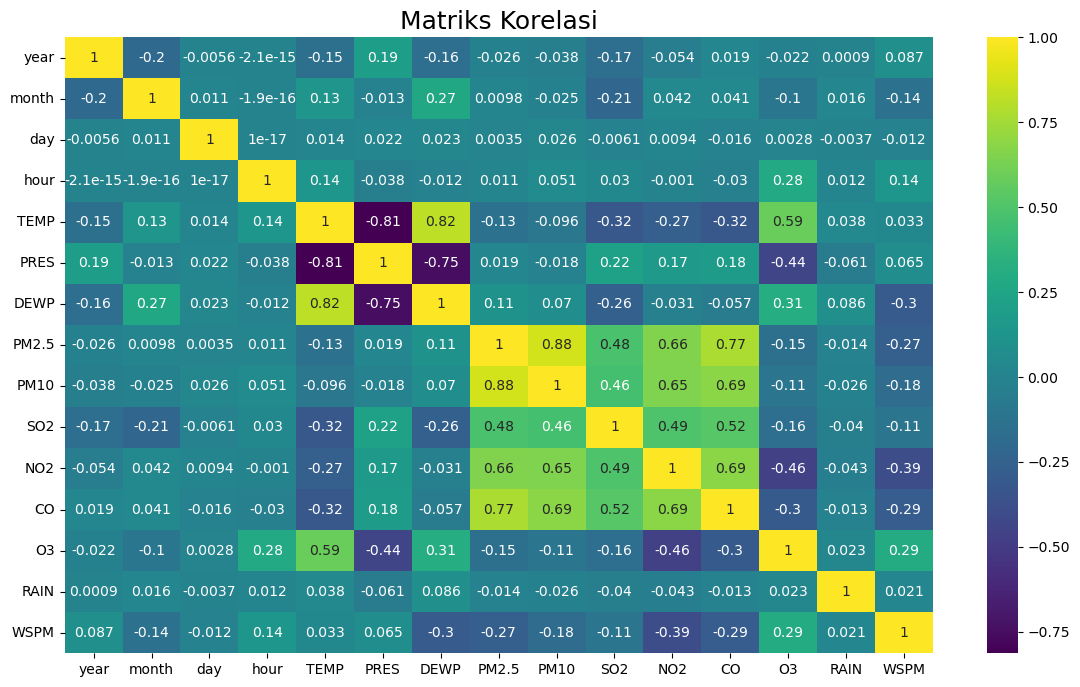

In [29]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    df_cleaned.drop("index", axis=1).corr(numeric_only=True), annot=True, cmap="viridis"
)
plt.title("Matriks Korelasi", fontsize=18)

plt.show()

Text(0.5, 1.0, 'Korelasi Matriks untuk Polutan')

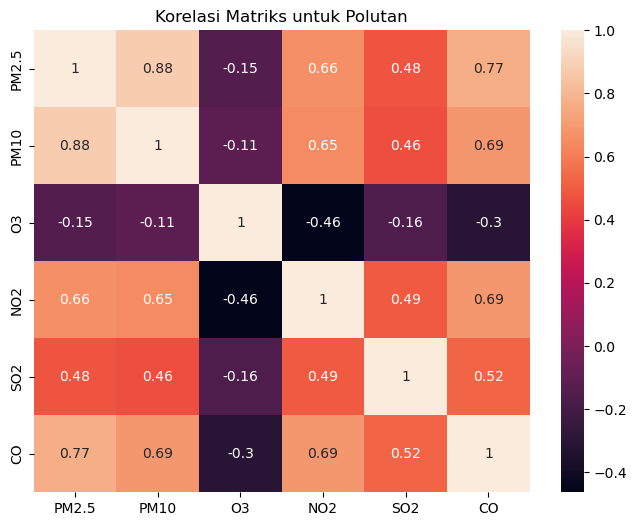

In [30]:
plt.figure(figsize=(8, 6))

corr = df_cleaned[["PM2.5", "PM10", "O3", "NO2", "SO2", "CO"]].corr()
sns.heatmap(data=corr, annot=True)
plt.title("Korelasi Matriks untuk Polutan")

- Beberapa kolom menunjukkan korelasi yang cukup kuat dengan fitur-fitur tertentu dan rata-rata hubungan kuat itu berjenis **Positive Correlation**.
- Sebagai contoh, kolom dengan grup polutan (PM2.5, PM10, SO2, NO2, CO) menunjukkan antar hubungan yang kuat.
- Kita akan fokus untuk mendapatkan Air Quality Index (AQI) dengan mencari tahu korelasi antar kolom-kolom tersebut.


In [31]:
pollution = df_cleaned[["PM2.5", "PM10", "O3", "NO2", "SO2", "CO"]]

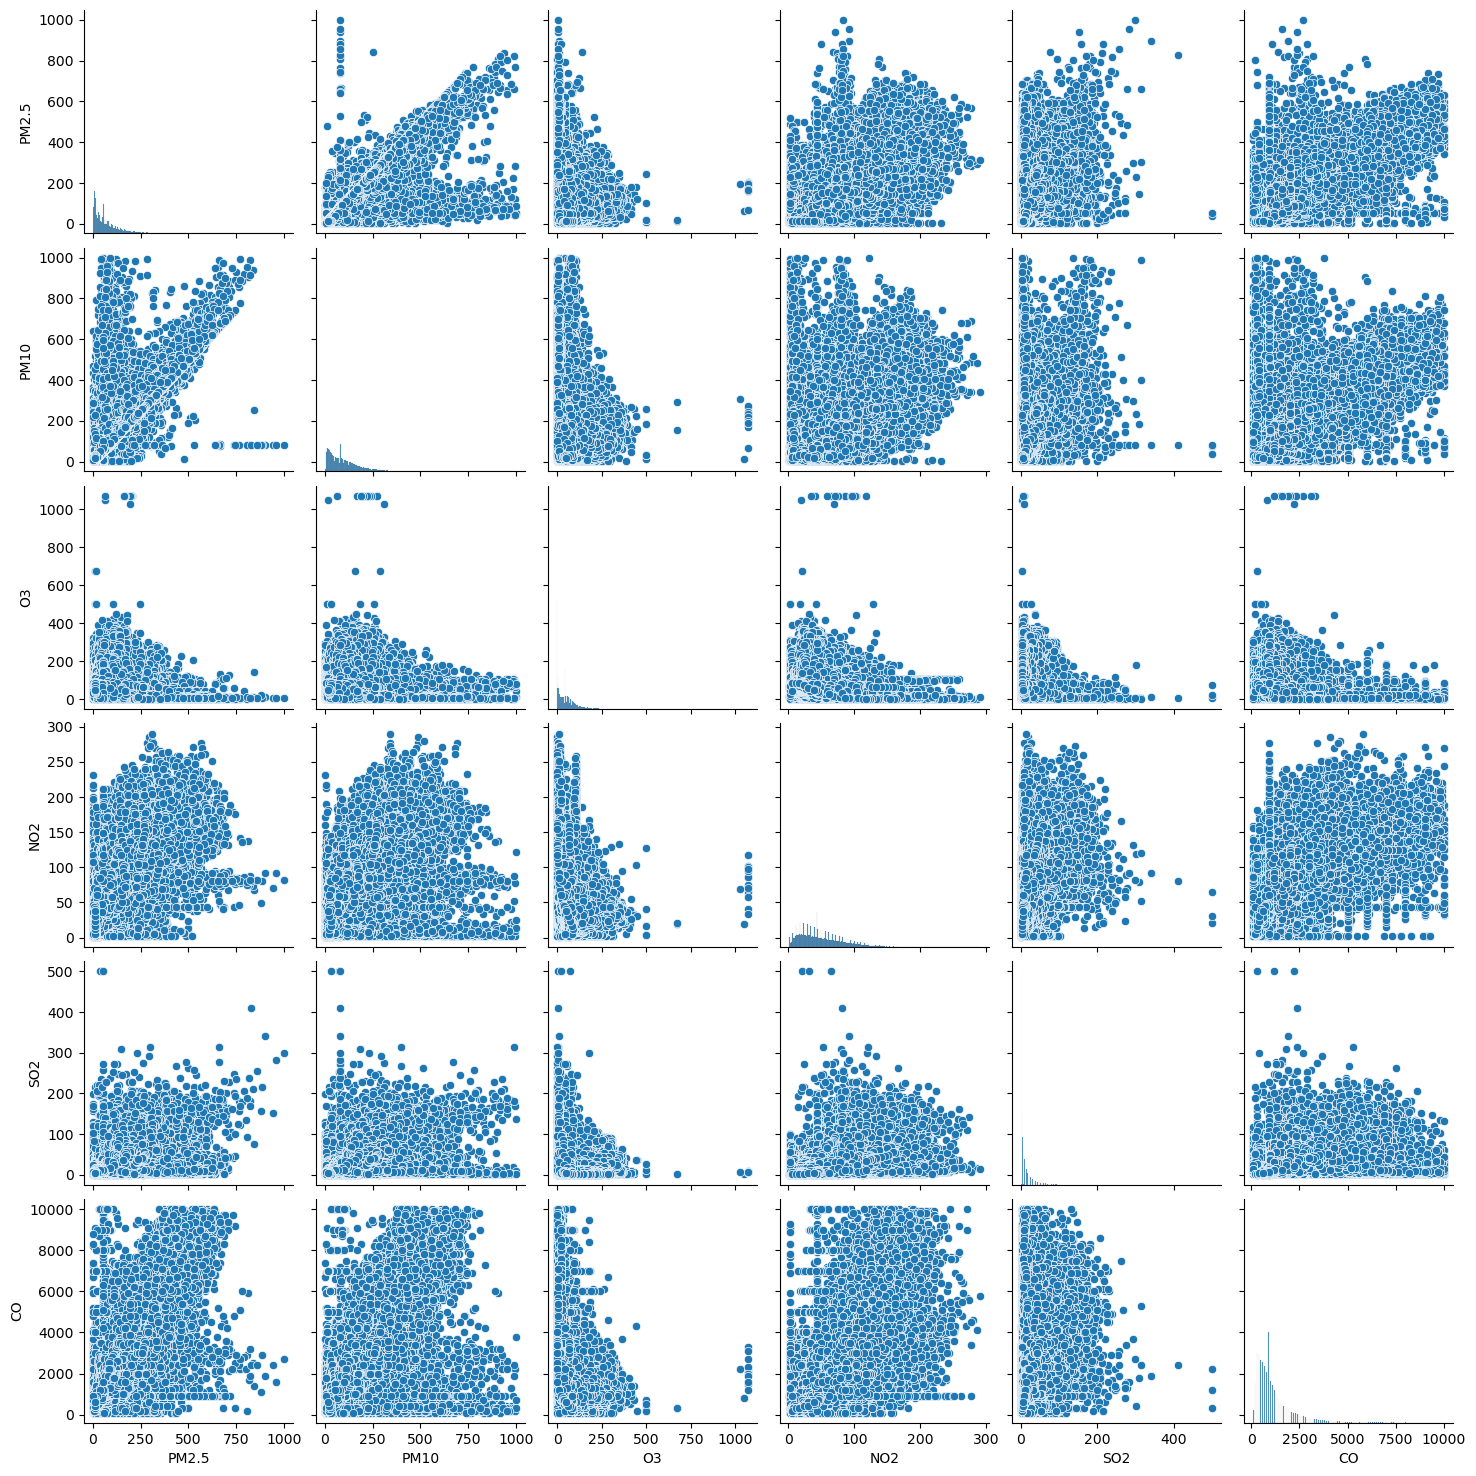

In [32]:
sns.pairplot(pollution)

#### Indeks Kualitas Udara Secara Keseluruhan

<table>
    <thead>
        <th>AQI</th>
        <th>Kategori</th>
    </thead>
    <tbody>
        <tr>
            <td>0 - 50</td>
            <td>Baik</td>
        </tr>
        <tr>
            <td>51 - 100</td>
            <td>Sedang</td>
        </tr>
        <tr>
            <td>101 - 150</td>
            <td>Tidak Sehat Untuk Populasi Sensitif</td>
        </tr>
        <tr>
            <td>151 - 200</td>
            <td>Tidak Sehat</td>
        </tr>
        <tr>
            <td>201 - 300</td>
            <td>Sangat Tidak Sehat</td>
        </tr>
        <tr>
            <td>>300</td>
            <td>Berbahaya</td>
        </tr>
    </tbody>
</table>


Air Quality Index (AQI) didapat dari total akumulasi konsentrasi polutan. Polutan-polutan tersebut terdiri dari PM2.5, PM10, SO2, NO2, dan CO. Semakin tinggi nilai AQI maka semakin buruk juga kualitas udara yang didapatkan. Selain itu, kita juga akan melihat AQI secara spesifik berdasarkan polutan.


#### Rentang Indeks Kualitas Udara

<table>
    <thead>
        <tr>
            <th>Polutan</th>
            <th>Kategori</th>
            <th>Rentang Konsentrasi</th>
            <th>Satuan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan=5>PM2.5</th>
            <td>Baik</td>
            <td>0-10</td>
            <td rowspan=5>Mikrogram</td>
        </tr>
        <tr>
            <td>Sedang</td>
            <td>10.1-20</td>
        </tr>
        <tr>
            <td>Tidak Sehat</td>
            <td>20.1-25</td>
        </tr>
        <tr>
            <td>Sangat Tidak Sehat</td>
            <td>25.1-50</td>
        </tr>
        <tr>
            <td>Berbahaya</td>
            <td>>50</td>
        </tr>
        <tr>
            <th rowspan=5>PM10</th>
            <td>Baik</td>
            <td>0-20</td>
            <td rowspan=5>Mikrogram</td>
        </tr>
        <tr>
            <td>Sedang</td>
            <td>20.1-50</td>
        </tr>
        <tr>
            <td>Tidak Sehat</td>
            <td>50.1-100</td>
        </tr>
        <tr>
            <td>Sangat Tidak Sehat</td>
            <td>100.1-200</td>
        </tr>
        <tr>
            <td>Berbahaya</td>
            <td>>200</td>
        </tr>
        <tr>
            <th rowspan=5>SO2</th>
            <td>Baik</td>
            <td>0-20</td>
            <td rowspan=5>Mikrogram</td>
        </tr>
        <tr>
            <td>Sedang</td>
            <td>20.1-80</td>
        </tr>
        <tr>
            <td>Tidak Sehat</td>
            <td>80.1-250</td>
        </tr>
        <tr>
            <td>Sangat Tidak Sehat</td>
            <td>250.1-350</td>
        </tr>
        <tr>
            <td>Berbahaya</td>
            <td>>350</td>
        </tr>
        <tr>
            <th rowspan=5>NO2</th>
            <td>Baik</td>
            <td>0-40</td>
            <td rowspan=5>Mikrogram</td>
        </tr>
        <tr>
            <td>Sedang</td>
            <td>40.1-90</td>
        </tr>
        <tr>
            <td>Tidak Sehat</td>
            <td>90.1-180</td>
        </tr>
        <tr>
            <td>Sangat Tidak Sehat</td>
            <td>180.1-400</td>
        </tr>
        <tr>
            <td>Berbahaya</td>
            <td>>400</td>
        </tr>
        <tr>
            <th rowspan=5>O3</th>
            <td>Baik</td>
            <td>0-60</td>
            <td rowspan=5>Mikrogram</td>
        </tr>
        <tr>
            <td>Sedang</td>
            <td>60.1-120</td>
        </tr>
        <tr>
            <td>Tidak Sehat</td>
            <td>120.1-180</td>
        </tr>
        <tr>
            <td>Sangat Tidak Sehat</td>
            <td>180.1-240</td>
        </tr>
        <tr>
            <td>Berbahaya</td>
            <td>>240</td>
        </tr>
        <tr>
            <th rowspan=5>CO</th>
            <td>Baik</td>
            <td>0-4</td>
            <td rowspan=5>Mikrogram</td>
        </tr>
        <tr>
            <td>Sedang</td>
            <td>4.1-10</td>
        </tr>
        <tr>
            <td>Tidak Sehat</td>
            <td>10.1-17</td>
        </tr>
        <tr>
            <td>Sangat Tidak Sehat</td>
            <td>17.1-34</td>
        </tr>
        <tr>
            <td>Berbahaya</td>
            <td>>34</td>
        </tr>
    </tbody>
</table>


In [33]:
df_cleaned["CO"].unique()

array([  300.,   400.,   500.,   600.,   700.,   800.,   900.,  1000.,
        1200.,  1100.,  1300.,  1399.,  1500.,  1700.,  1899.,  2200.,
        2399.,  2500.,  2799.,  2100.,  2000.,  2299.,  2600.,  1800.,
        1600.,  2899.,  2700.,  3100.,  3200.,  4400.,  4000.,  3500.,
        3700.,  4200.,  3799.,  4099.,  5000.,  5599.,  5700.,  4599.,
        3299.,  3399.,  3899.,  4900.,  5200.,  3600.,  3000.,   200.,
        1400.,   100.,  1900.,  2300.,  2400.,  2800.,  3300.,  2900.,
        3400.,  5400.,  5800.,  5900.,  5300.,  3800.,  3900.,  4100.,
        4500.,  5100.,  5600.,  4800.,  4600.,  6300.,  6400.,  4300.,
        4700.,  6000.,  6700.,  7300.,  7000.,  7100.,  7700.,  8300.,
        8900.,  8100.,  7600.,  6800.,  5500.,  6500.,  7400.,  6900.,
        6200.,  6600.,  6100.,  7800.,  7200.,  7900.,  8000.,  9000.,
        7500.,  8800.,  9300.,  9100.,  8400.,  9600., 10000.,  9500.,
        9900.,  9400.,  8500.,  8200.,  8600.,  8700.,  9700.,  9200.,
      

In [34]:
df_cleaned["CO"] = df_cleaned["CO"].apply(lambda x: x * 0.001)

In [35]:
pm2_conditions = [
    (df_cleaned["PM2.5"] >= 0) & (df_cleaned["PM2.5"] <= 10),
    (df_cleaned["PM2.5"] > 10) & (df_cleaned["PM2.5"] <= 20),
    (df_cleaned["PM2.5"] > 20) & (df_cleaned["PM2.5"] <= 25),
    (df_cleaned["PM2.5"] > 25) & (df_cleaned["PM2.5"] <= 50),
    (df_cleaned["PM2.5"] > 50),
]

pm10_conditions = [
    (df_cleaned["PM10"] >= 0) & (df_cleaned["PM10"] <= 20),
    (df_cleaned["PM10"] > 20) & (df_cleaned["PM10"] <= 50),
    (df_cleaned["PM10"] > 50) & (df_cleaned["PM10"] <= 100),
    (df_cleaned["PM10"] > 100) & (df_cleaned["PM10"] <= 200),
    (df_cleaned["PM10"] > 200),
]

so2_conditions = [
    (df_cleaned["SO2"] >= 0) & (df_cleaned["SO2"] <= 20),
    (df_cleaned["SO2"] > 20) & (df_cleaned["SO2"] <= 80),
    (df_cleaned["SO2"] > 80) & (df_cleaned["SO2"] <= 250),
    (df_cleaned["SO2"] > 250) & (df_cleaned["SO2"] <= 350),
    (df_cleaned["SO2"] > 350),
]

no2_conditions = [
    (df_cleaned["NO2"] >= 0) & (df_cleaned["NO2"] <= 40),
    (df_cleaned["NO2"] > 40) & (df_cleaned["NO2"] <= 90),
    (df_cleaned["NO2"] >= 90) & (df_cleaned["NO2"] <= 180),
    (df_cleaned["NO2"] >= 180) & (df_cleaned["NO2"] <= 400),
    (df_cleaned["NO2"] > 400),
]

o3_conditions = [
    (df_cleaned["O3"] >= 0) & (df_cleaned["O3"] <= 60),
    (df_cleaned["O3"] > 60) & (df_cleaned["O3"] <= 120),
    (df_cleaned["O3"] > 120) & (df_cleaned["O3"] <= 180),
    (df_cleaned["O3"] > 180) & (df_cleaned["O3"] <= 240),
    (df_cleaned["O3"] > 240),
]

co_conditions = [
    (df_cleaned["CO"] >= 0) & (df_cleaned["CO"] <= 4),
    (df_cleaned["CO"] > 4) & (df_cleaned["CO"] <= 10),
    (df_cleaned["CO"] > 10) & (df_cleaned["CO"] <= 17),
    (df_cleaned["CO"] > 17) & (df_cleaned["CO"] <= 34),
    (df_cleaned["CO"] > 34),
]

labels = ["Good", "Moderate", "Unhealthy", "Very Unhealthy", "Hazardous"]

df_cleaned["PM2.5_AQI"] = np.select(pm2_conditions, labels)
df_cleaned["PM10_AQI"] = np.select(pm10_conditions, labels)
df_cleaned["SO2_AQI"] = np.select(so2_conditions, labels)
df_cleaned["NO2_AQI"] = np.select(no2_conditions, labels)
df_cleaned["O3_AQI"] = np.select(o3_conditions, labels)
df_cleaned["CO_AQI"] = np.select(co_conditions, labels)

In [36]:
df_cleaned["Total_AQI"] = (
    df_cleaned["PM2.5"]
    + df_cleaned["PM10"]
    + df_cleaned["SO2"]
    + df_cleaned["NO2"]
    + df_cleaned["O3"]
    + df_cleaned["CO"]
)

In [37]:
df_cleaned.head(10)

,index,year,month,day,hour,station,TEMP,PRES,DEWP,PM2.5,...,RAIN,WSPM,wd,PM2.5_AQI,PM10_AQI,SO2_AQI,NO2_AQI,O3_AQI,CO_AQI,Total_AQI
0,0,2013,3,1,0,Aotizhongxin,-0.7,1023.0,-18.8,4.0,...,0.0,4.4,NNW,Good,Good,Good,Good,Moderate,Good,96.3
1,1,2013,3,1,1,Aotizhongxin,-1.1,1023.2,-18.2,8.0,...,0.0,4.7,N,Good,Good,Good,Good,Moderate,Good,104.3
2,2,2013,3,1,2,Aotizhongxin,-1.1,1023.5,-18.2,7.0,...,0.0,5.6,NNW,Good,Good,Good,Good,Moderate,Good,102.3
3,3,2013,3,1,3,Aotizhongxin,-1.4,1024.5,-19.4,6.0,...,0.0,3.1,NW,Good,Good,Good,Good,Moderate,Good,106.3
4,4,2013,3,1,4,Aotizhongxin,-2.0,1025.2,-19.5,3.0,...,0.0,2.0,N,Good,Good,Good,Good,Moderate,Good,102.3
5,5,2013,3,1,5,Aotizhongxin,-2.2,1025.6,-19.6,5.0,...,0.0,3.7,N,Good,Good,Good,Good,Moderate,Good,112.4
6,6,2013,3,1,6,Aotizhongxin,-2.6,1026.5,-19.1,3.0,...,0.0,2.5,NNE,Good,Good,Good,Good,Good,Good,106.5
7,7,2013,3,1,7,Aotizhongxin,-1.6,1027.4,-19.1,3.0,...,0.0,3.8,NNW,Good,Good,Good,Moderate,Good,Good,112.5
8,8,2013,3,1,8,Aotizhongxin,0.1,1028.3,-19.2,3.0,...,0.0,4.1,NNW,Good,Good,Good,Moderate,Good,Good,113.5
9,9,2013,3,1,9,Aotizhongxin,1.2,1028.5,-19.3,3.0,...,0.0,2.6,N,Good,Good,Good,Good,Good,Good,110.4


In [38]:
aqi_conditions = [
    (df_cleaned["Total_AQI"] >= 0) & (df_cleaned["Total_AQI"] <= 50),
    (df_cleaned["Total_AQI"] > 50) & (df_cleaned["Total_AQI"] <= 100),
    (df_cleaned["Total_AQI"] > 100) & (df_cleaned["Total_AQI"] <= 150),
    (df_cleaned["Total_AQI"] > 150) & (df_cleaned["Total_AQI"] <= 200),
    (df_cleaned["Total_AQI"] > 200) & (df_cleaned["Total_AQI"] <= 300),
    (df_cleaned["Total_AQI"] > 300),
]

labels = [
    "Good",
    "Moderate",
    "Unhealthy",
    "Unhealthy (Sensitive)",
    "Very Unhealthy",
    "Hazardous",
]

df_cleaned["AQI"] = np.select(aqi_conditions, labels, default="Unknown")

In [39]:
df_cleaned["AQI"].value_counts()

AQI
Hazardous                175418
Very Unhealthy            91180
Unhealthy                 73043
Unhealthy (Sensitive)     54727
Moderate                  25798
Good                        602
Name: count, dtype: int64

## Visualization & Explanatory Analysis


### Pertanyaan 1: Berapa persentase kualitas udara tertinggi secara keseluruhan dan secara polutan berdasarkan tingkat bahaya?


Text(0.5, 1.0, 'Persentase Kualitas Udara Secara Keseluruhan')

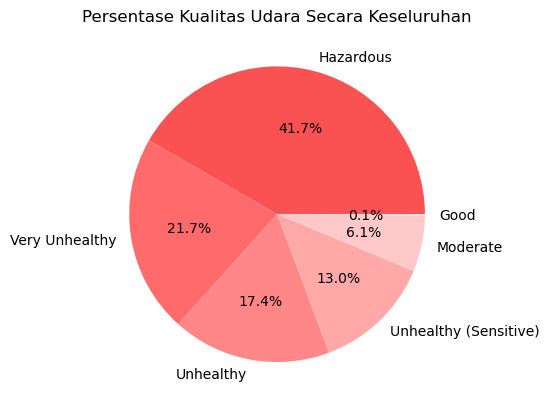

In [40]:
x = df_cleaned["AQI"].value_counts().reset_index()
total = x["count"].sum()
x["percentage"] = np.round((x["count"] / total) * 100, 2)

colors = ["#fa5252", "#ff6b6b", "#ff8787", "#ffa8a8", "#ffc9c9", "#ffe3e3"]
plt.pie(x["percentage"], labels=x["AQI"], autopct="%1.1f%%", colors=colors)
plt.title("Persentase Kualitas Udara Secara Keseluruhan")

In [41]:
lst = [col for col in df_cleaned.columns if col.find("_AQI") != -1]
lst

['PM2.5_AQI',
 'PM10_AQI',
 'SO2_AQI',
 'NO2_AQI',
 'O3_AQI',
 'CO_AQI',
 'Total_AQI']

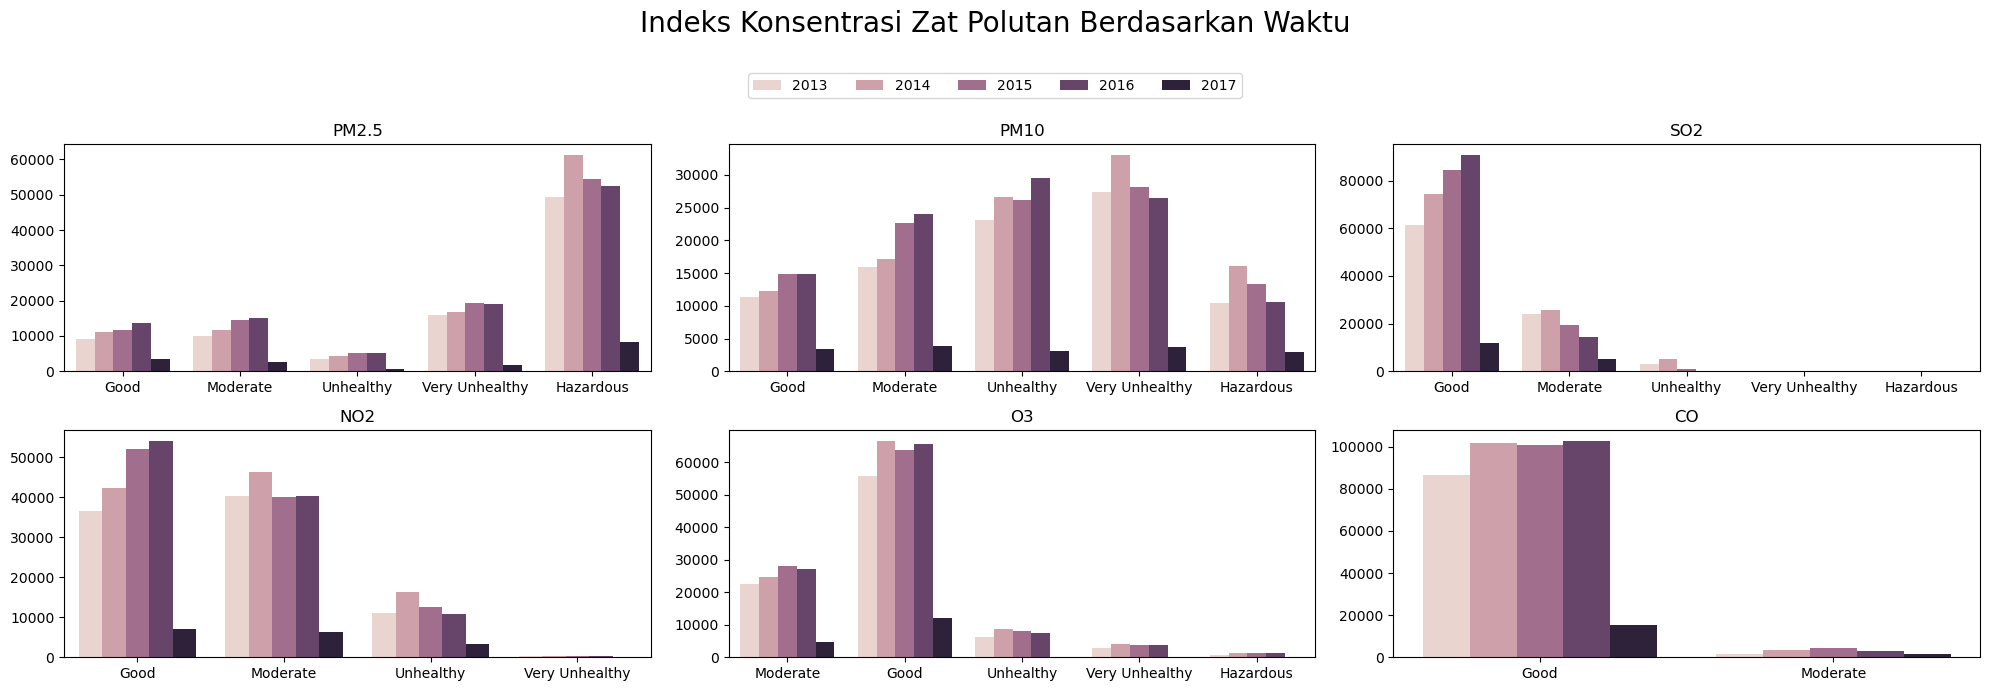

In [42]:
plt.figure(figsize=(20, 7))

for i in range(1, 7):
    ax = plt.subplot(2, 3, i)

    sns.countplot(data=df_cleaned, x=lst[i - 1], hue="year", ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title(f"{lst[i-1].split('_AQI')[0]}")
    ax.legend_.remove()

plt.suptitle("Indeks Konsentrasi Zat Polutan Berdasarkan Waktu", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.9])

handles, labels = ax.get_legend_handles_labels()
plt.figlegend(
    handles, labels, loc="upper center", ncol=len(labels), bbox_to_anchor=(0.5, 0.9)
)

plt.show()

#### Insights:


1. Tingkat kualitas udara tertinggi berada di level Hazardous (sangat berbahaya) dengan persentase sebesar 41.7% disusul oleh level very unhealthy (sangat tidak sehat) dengan persentase sebesar 21.7%
2. Beberapa polutan mostly memiliki kadar konsentrasi yang bisa dibilang cukup baik di setiap tahunnya seperti zat SO2, NO2, 03, dan CO. Namun ada juga zat yang masuk ke kategori berbahaya seperti PM2.5 dan PM10.


### Pertanyaan 2: Stasiun mana yang paling banyak terkena dampak polusi?


Di sini kita akan menjawab pertanyaan dua dengan lebih detail dengan membagi kadar polusi berdasarkan jenisnya, yaitu polusi kendaraan dan polusi pabrik. Polusi Kendaraan merupakan gabungan dari PM2.5, PM10, NO2, dan CO. Sedangkan Polusi Pabrik merupakan gabungan dari SO2, O3, CO, dan NO2


In [43]:
df_cleaned["vehicle_pollution"] = (
    df_cleaned["PM2.5"] + df_cleaned["PM10"] + df_cleaned["NO2"] + df_cleaned["CO"]
)
df_cleaned["industrial_pollution"] = (
    df_cleaned["SO2"] + df_cleaned["O3"] + df_cleaned["CO"] + df_cleaned["NO2"]
)

In [44]:
polluted_station = (
    df_cleaned.groupby(by="station")
    .agg(
        {
            "vehicle_pollution": "median",
            "industrial_pollution": "median",
            "Total_AQI": "median",
        }
    )
    .reset_index()
)

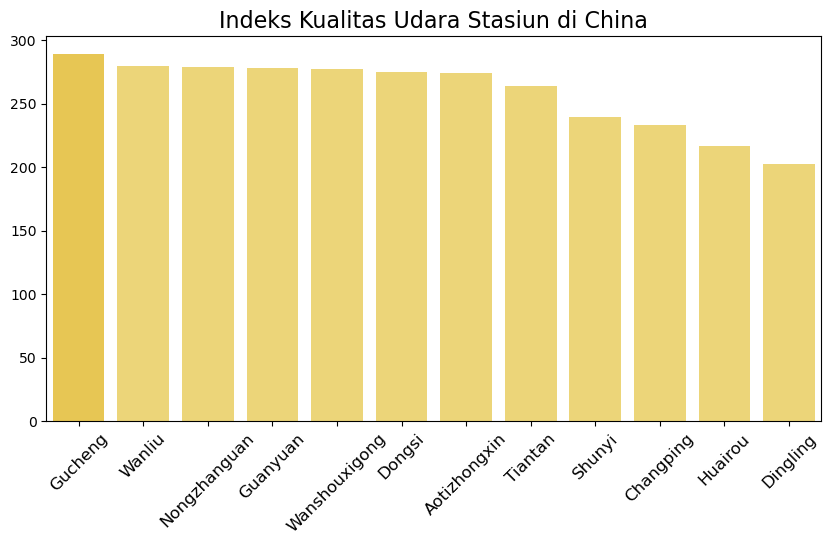

In [45]:
plt.figure(figsize=(10, 5))

colors = [
    "#ffd43b",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
]

sns.barplot(
    data=polluted_station.sort_values("Total_AQI", ascending=False),
    x="station",
    y="Total_AQI",
    palette=colors,
)
plt.xlabel(None)
plt.ylabel(None)

plt.tick_params(axis="x", labelsize=12)
plt.xticks(rotation=45)
plt.title("Indeks Kualitas Udara Stasiun di China", fontsize=16)

plt.show()

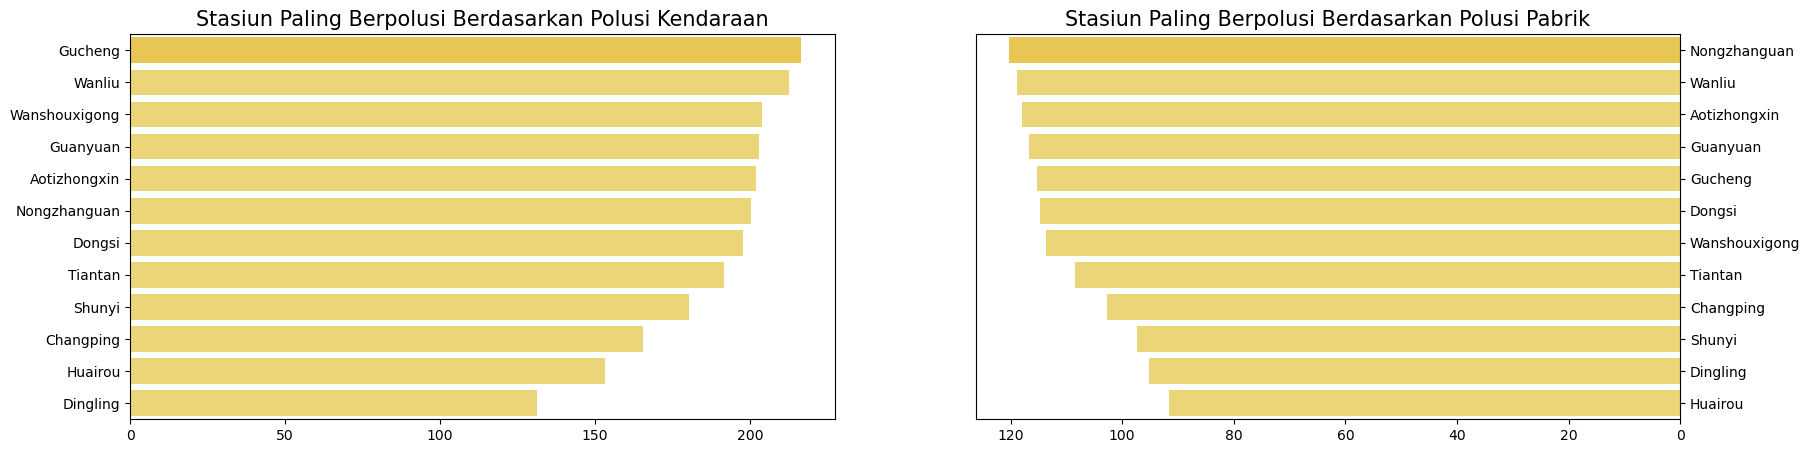

In [46]:
fig, ax = plt.subplots(figsize=(20, 5), nrows=1, ncols=2)

sns.barplot(
    data=polluted_station.sort_values(by="vehicle_pollution", ascending=False),
    y="station",
    x="vehicle_pollution",
    palette=colors,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Stasiun Paling Berpolusi Berdasarkan Polusi Kendaraan", fontsize=15)

sns.barplot(
    data=polluted_station.sort_values(by="industrial_pollution", ascending=False),
    y="station",
    x="industrial_pollution",
    palette=colors,
    ax=ax[1],
)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Stasiun Paling Berpolusi Berdasarkan Polusi Pabrik", fontsize=15)

plt.show()

#### Insights


1. Secara keseluruhan, stasiun Gucheng menempati peringkat atas sebagai stasiun dengan kualitas udara terburuk. Disusul oleh Wanliu, Nongzhanguan, Guanyuan, dan Wanshouxigong.
2. Gucheng masih menempati peringkat satu sebagai stasiun dengan kualitas udara terburuk berdasarkan polusi kendaraan. Namun terdapat sedikit perbedaan peringkat dimana peringkat tiga jatuh pada Wanshouxigong dan peringkat lima jatuh pada Aotizhongxin.
3. Stasiun dengan kualitas udara paling buruk berdasarkan polusi pabrik jatuh kepada Nongzhanguan. Stasiun gucheng berada di peringkat lima.
4. Stasiun Wenliu stabil pada peringkat dua terburuk baik itu polusi kendaraan maupun polusi pabrik.


### Pertanyaan 3: Bagaimana konsentrasi polusi udara pada waktu tertentu (Pagi, Siang, Malam)?


Pada pertanyaan ini, kita akan melihat bagaimana konsentrasi polusi udara pada rentang waktu tertentu. Rentang waktu akan dibagi menjadi tiga, yaitu **Morning (Pagi)**, **Afternoon (Siang)**, dan **Evening (malam)**. Penulis akan mengelompokkan data berdasarkan kolom `hour`. Berikut rincian kondisi untuk mengkategorisasikan waktu:

1. Pagi: `00:00 AM - 11:00 AM`
2. Siang & Sore: `11:01 AM - 18:00 PM`
3. Malam: `18:01 PM - 23:59 PM`


In [47]:
conditions = [
    (df_cleaned["hour"] >= 0) & (df_cleaned["hour"] < 11),
    (df_cleaned["hour"] >= 11) & (df_cleaned["hour"] < 18),
    (df_cleaned["hour"] >= 18) & (df_cleaned["hour"] < 24),
]
choices = ["Morning", "Afternoon", "Evening"]

df_cleaned["time_group"] = np.select(conditions, choices, default="Unknown")

In [48]:
pollution_by_time = (
    df_cleaned.groupby(by="time_group")
    .agg(
        {
            "vehicle_pollution": "median",
            "industrial_pollution": "median",
            "Total_AQI": "median",
        }
    )
    .reset_index()
)

In [49]:
colors = [
    "#ffd43b",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
    "#ffe066",
]

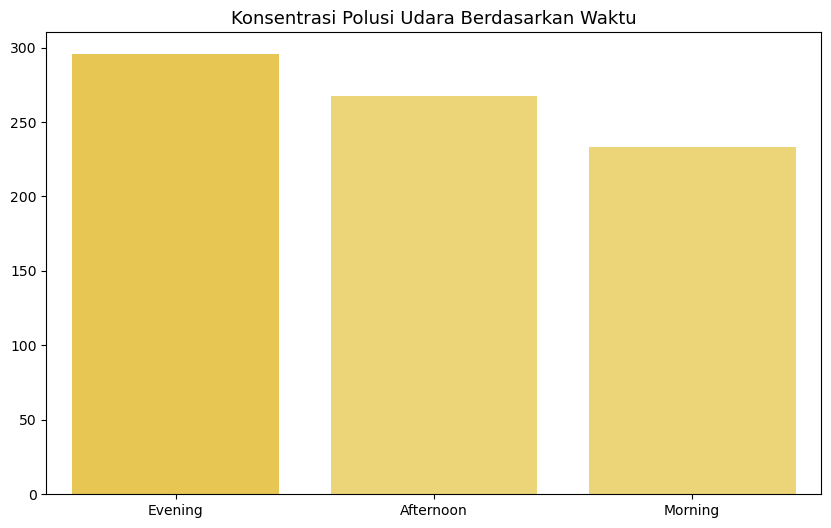

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pollution_by_time.sort_values(by="Total_AQI", ascending=False),
    x="time_group",
    y="Total_AQI",
    palette=colors,
)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Konsentrasi Polusi Udara Berdasarkan Waktu", fontsize=13)

plt.show()

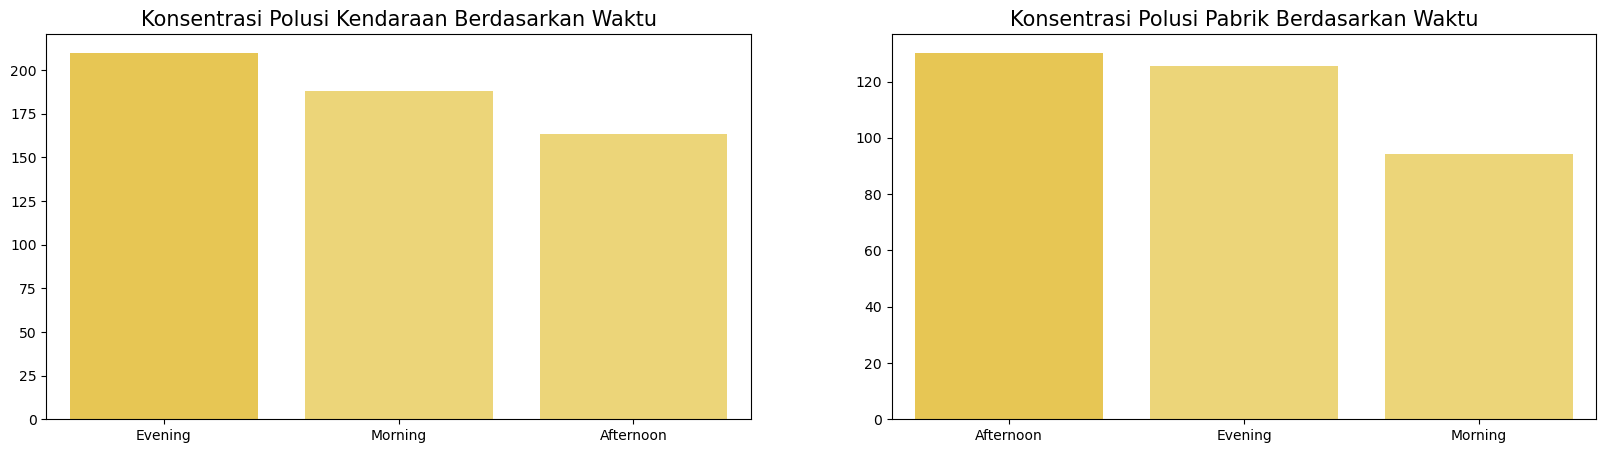

In [51]:
fig, ax = plt.subplots(figsize=(20, 5), nrows=1, ncols=2)

sns.barplot(
    data=pollution_by_time.sort_values(by="vehicle_pollution", ascending=False),
    x="time_group",
    y="vehicle_pollution",
    palette=colors,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Konsentrasi Polusi Kendaraan Berdasarkan Waktu", fontsize=15)

sns.barplot(
    data=pollution_by_time.sort_values(by="industrial_pollution", ascending=False),
    x="time_group",
    y="industrial_pollution",
    palette=colors,
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Konsentrasi Polusi Pabrik Berdasarkan Waktu", fontsize=15)

plt.show()

#### Insight:


1. Polusi Kendaraan berada di puncak konsentrasi pada saat malam hari, sedangkan polusi pabrik akan memuncak pada siang hari.
2. Polusi kendaraan akan menurun pada saat siang hari. Hal ini masuk akal karena pada siang hari, tidak banyak orang yang mengendarai transportasi dikarenakan sibuk bekerja atau aktivitas lain.
3. Sedangkan polusi pabrik akan menurun pada saat pagi hari. Hal ini dikarenakan banyak pabrik yang belum beroperasi pada pagi hari.


### Pertanyaan 4: Bagaimana perubahan konsentrasi polusi udara dari waktu ke waktu?


In [52]:
pollution_tren = (
    df_cleaned.groupby(by="year")
    .agg(
        {
            "vehicle_pollution": "median",
            "industrial_pollution": "median",
            "Total_AQI": "median",
        }
    )
    .reset_index()
)

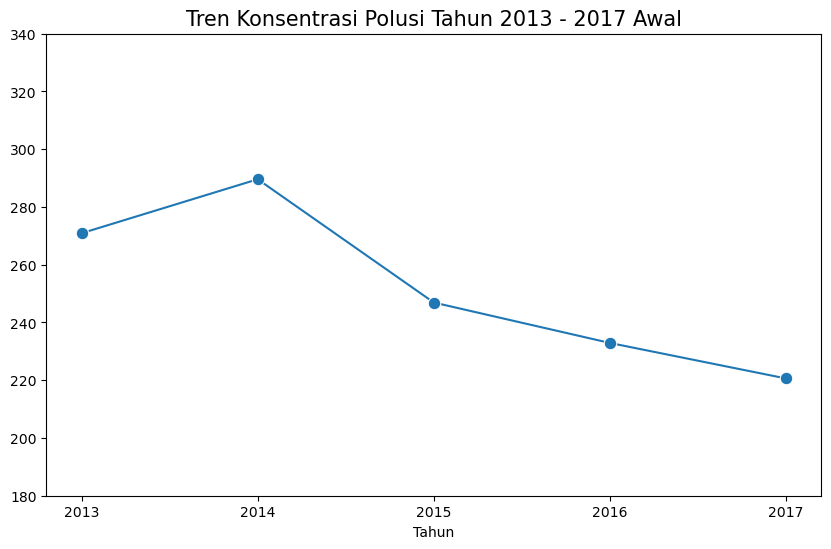

In [53]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=pollution_tren, x="year", y="Total_AQI", marker="o", markersize=9)
plt.ylabel(None)
plt.xlabel("Tahun")
plt.xticks(pollution_tren["year"])
plt.yticks(np.arange(180, 350, 20))

plt.title("Tren Konsentrasi Polusi Tahun 2013 - 2017 Awal", fontsize=15)


plt.show()

In [54]:
pollution_tren["AQI_pct"] = np.round(pollution_tren["Total_AQI"].pct_change() * 100, 2)
pollution_tren["AQI_pct"] = pollution_tren["AQI_pct"].fillna(0)
pollution_tren

,year,vehicle_pollution,industrial_pollution,Total_AQI,AQI_pct
0,2013,198.9,113.5,270.90665,0.00
1,2014,209.8,119.0,289.60000,6.90
2,2015,180.3,107.3,246.90000,-14.74
3,2016,168.4,99.7,232.90000,-5.67
4,2017,169.9,104.2,220.60000,-5.28


In [55]:
num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month = [
    "Jan",
    "Feb",
    "Maret",
    "April",
    "Mei",
    "Juni",
    "Juli",
    "Agu",
    "Sept",
    "Okt",
    "Nov",
    "Des",
]
month_map = {num[i]: month[i] for i in range(12)}

Text(0.5, 1.0, 'Tren Tingkat Polusi Tahun 2013 - 2017 Awal Berdasarkan Bulan')

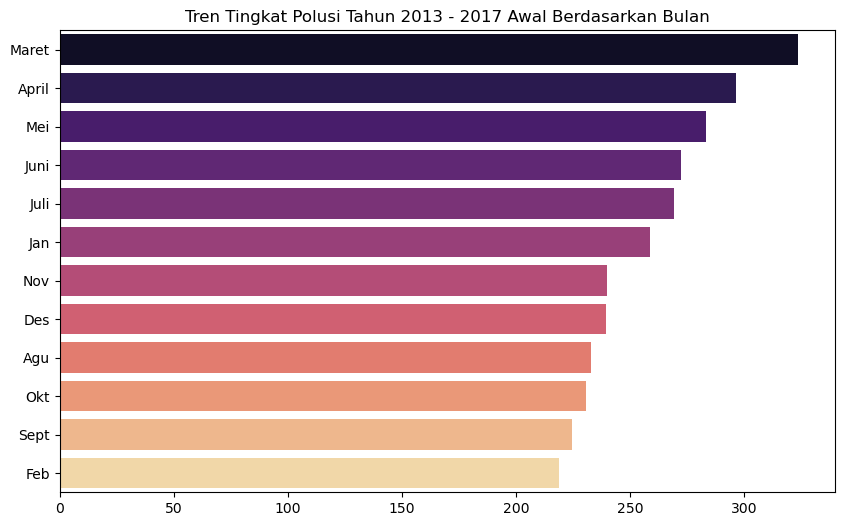

In [56]:
pollution_by_month = (
    df_cleaned.groupby(by=["month"])["Total_AQI"]
    .median()
    .reset_index()
    .sort_values(by="Total_AQI", ascending=False)
)
pollution_by_month["month"] = pollution_by_month["month"].map(month_map)


plt.figure(figsize=(10, 6))


sns.barplot(data=pollution_by_month, y="month", x="Total_AQI", palette="magma")


plt.xlabel(None)


plt.ylabel(None)


plt.title("Tren Tingkat Polusi Tahun 2013 - 2017 Awal Berdasarkan Bulan")

#### Insights:


1. Tingkat polusi udara di setiap tahun semakin menurun dari tahun 2014 - 2017. Namun perlu diketahui bahwa dataset yang penulis uji merupakan kumpulan data mulai dari 2013 maret sampai 2017 Februari sehingga data untuk tahun 2017 masih sangat sedikit. Akan ada potensi kenaikan polusi pada tahun 2017.
2. Bulan maret merupakan bulan dengan tingkat polusi paling tinggi disusul dengan bulan April dan Mei.
3. Bulan Februari merupakan bulang dengan tingkat polusi paling rendah disusul oleh September dan oktober.


### Pertanyaan 5: Berapa konsentrasi curah hujan yang terjadi pada setiap tahun? Di bulan apa hujan sering terjadi? Apakah hujan dapat meningkatkan kualitas udara?


Pertanyaan ini mengacu pada topik bagaimana cara mengurangi kadar polusi dengan cara mengandalkan hujan. Oleh karena itu, penulis tertarik untuk menelusuri lebih dalam terkati fitur `RAIN`. Mulai dari informasi sederhana sampai konklusi akhir.


In [57]:
rain_by_year = (
    df_cleaned.groupby(by=["year"])
    .agg(
        {
            "RAIN": "sum",
        }
    )
    .reset_index()
)


rain_by_year["RAIN_pct"] = np.round(
    rain_by_year["RAIN"].pct_change().fillna(0) * 100, 2
)

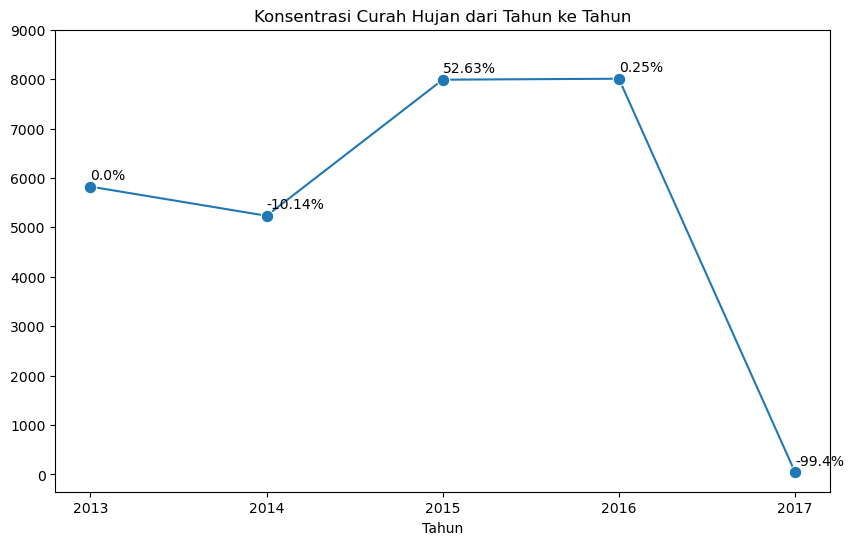

In [58]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=rain_by_year, x="year", y="RAIN", marker="o", markersize=9)
ax.set_ylabel(None)
ax.set_xlabel("Tahun")
ax.set_xticks(rain_by_year["year"])
ax.set_yticks(np.arange(0, 10000, 1000))
ax.set_title("Konsentrasi Curah Hujan dari Tahun ke Tahun")

for i, txt in enumerate(rain_by_year["RAIN_pct"]):
    ax.annotate(
        f"{txt}%",
        (rain_by_year["year"][i], rain_by_year["RAIN"][i]),
        textcoords="offset points",
        xytext=(0, 5),
    )

In [59]:
rain_by_year_month = (
    df_cleaned.groupby(by=["year", "month"])["RAIN"].sum().reset_index()
)
rain_by_year_month["month"] = rain_by_year_month["month"].map(month_map)

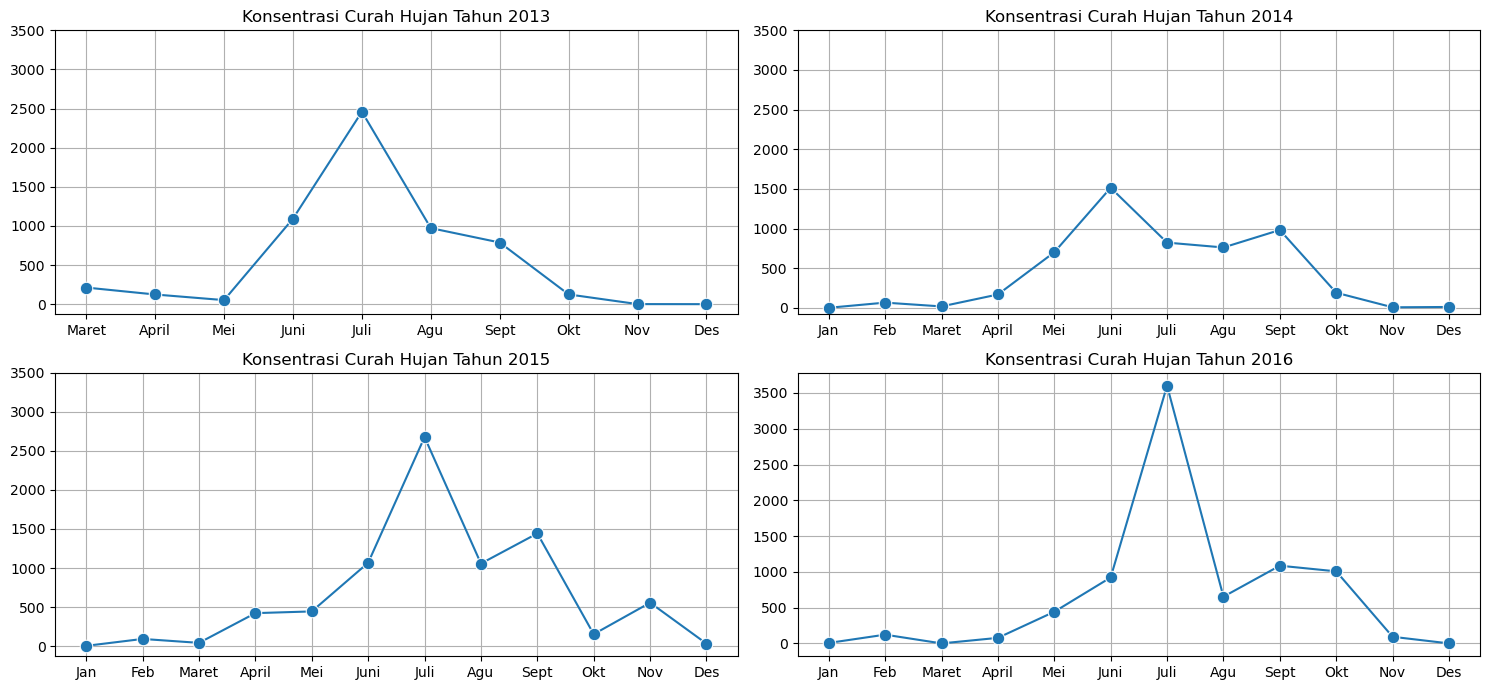

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

years = [2013, 2014, 2015, 2016, 2017]
index = 0
for i in range(2):
    for j in range(2):
        temp_df = rain_by_year_month[rain_by_year_month["year"] == years[index]]

        sns.lineplot(
            data=temp_df, x="month", y="RAIN", marker="o", markersize=9, ax=ax[i, j]
        )
        ax[i, j].set_title(f"Konsentrasi Curah Hujan Tahun {years[index]}")
        ax[i, j].set_xlabel(None)
        ax[i, j].set_ylabel(None)
        ax[i, j].set_yticks(np.arange(0, 4000, 500))
        ax[i, j].set_xticks(temp_df["month"].unique())
        ax[i, j].grid(True)

        index += 1

plt.tight_layout()

Text(0.5, 1.0, 'Total Akumulasi Konsentrasi Curah Hujan Tahun 2013 - 2017 Awal Per Bulan')

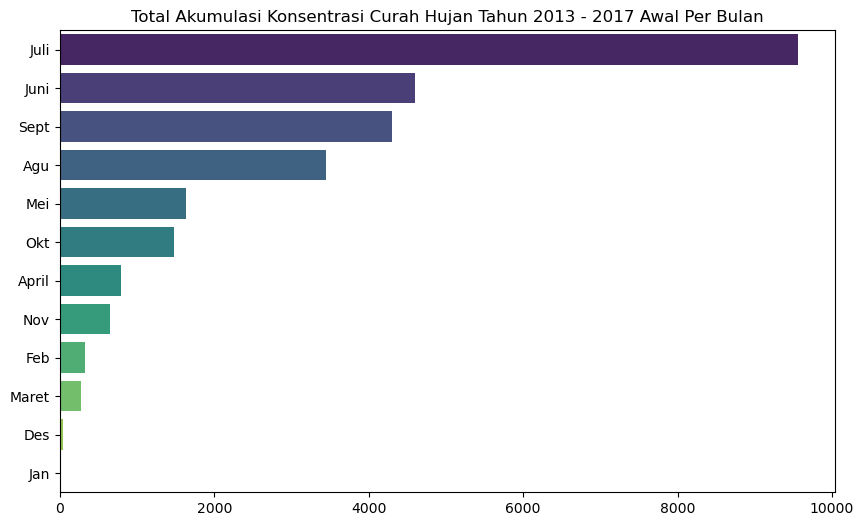

In [61]:
rain_by_month = (
    df_cleaned.groupby(by=["month"])["RAIN"]
    .sum()
    .reset_index()
    .sort_values(by="RAIN", ascending=False)
)
rain_by_month["month"] = rain_by_month["month"].map(month_map)


plt.figure(figsize=(10, 6))


sns.barplot(data=rain_by_month, y="month", x="RAIN", palette="viridis")


plt.xlabel(None)


plt.ylabel(None)


plt.title("Total Akumulasi Konsentrasi Curah Hujan Tahun 2013 - 2017 Awal Per Bulan")

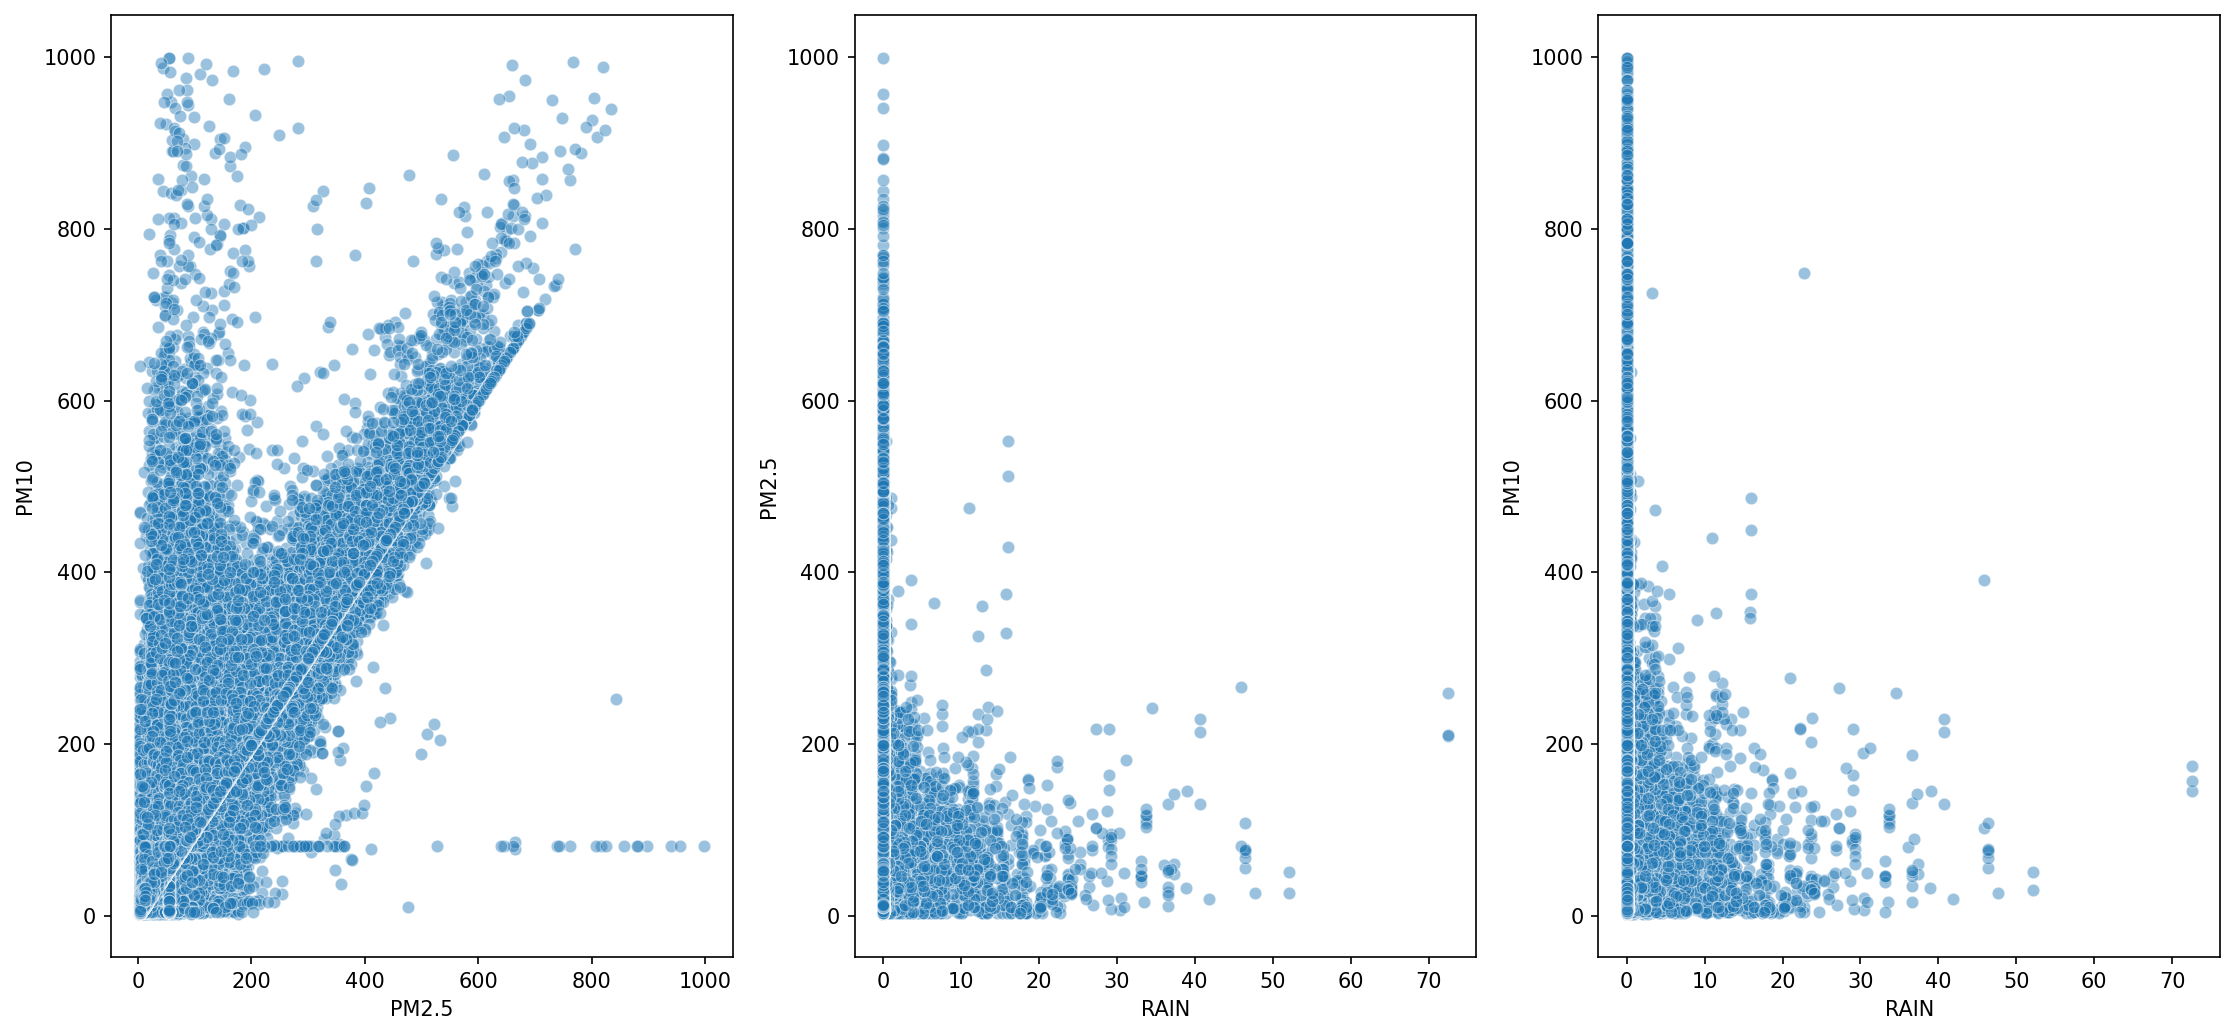

In [62]:
plt.figure(figsize=(15, 7), dpi=150)

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(data=df_cleaned, x="PM2.5", y="PM10", alpha=0.45, ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(data=df_cleaned, x="RAIN", y="PM2.5", alpha=0.45, ax=ax2)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(data=df_cleaned, x="RAIN", y="PM10", alpha=0.45, ax=ax3)

plt.tight_layout()

Berdasarkan visualisasi di atas, Zat PM10 punya korelasi yang kuat dengan PM2.5. Melalui visualisasi tersebut, kita juga mengetahui bahwa hujan dapat menurunkan kadar PM2.5 dan PM10 yang dimana kedua zat tersebut berperan besar dalam menurunkan kualitas udara. Setelah itu, kita akan melihat seberapa besar persentase penurunan kadar PM2.5 dan PM10 yang disebabkan oleh hujan.


In [63]:
pm_rain_by_year = (
    df_cleaned.groupby(by=["year"])
    .agg({"PM2.5": "median", "PM10": "median", "Total_AQI": "median", "RAIN": "sum"})
    .reset_index()
)


pm_rain_by_year["PM2.5_pct"] = np.round(
    pm_rain_by_year["PM2.5"].pct_change().fillna(0) * 100, 2
)


pm_rain_by_year["PM10_pct"] = np.round(
    pm_rain_by_year["PM10"].pct_change().fillna(0) * 100, 2
)


pm_rain_by_year["AQI_pct"] = np.round(
    pm_rain_by_year["Total_AQI"].pct_change().fillna(0) * 100, 2
)


pm_rain_by_year["RAIN_pct"] = np.round(
    pm_rain_by_year["RAIN"].pct_change().fillna(0) * 100, 2
)

In [64]:
pm_rain_by_year

,year,PM2.5,PM10,Total_AQI,RAIN,PM2.5_pct,PM10_pct,AQI_pct,RAIN_pct
0,2013,58.0,86.0,270.90665,5825.0,0.00,0.00,0.00,0.00
1,2014,60.0,93.0,289.60000,5234.2,3.45,8.14,6.90,-10.14
2,2015,54.0,79.0,246.90000,7988.8,-10.00,-15.05,-14.74,52.63
3,2016,50.0,74.0,232.90000,8008.4,-7.41,-6.33,-5.67,0.25
4,2017,48.0,71.0,220.60000,47.8,-4.00,-4.05,-5.28,-99.40


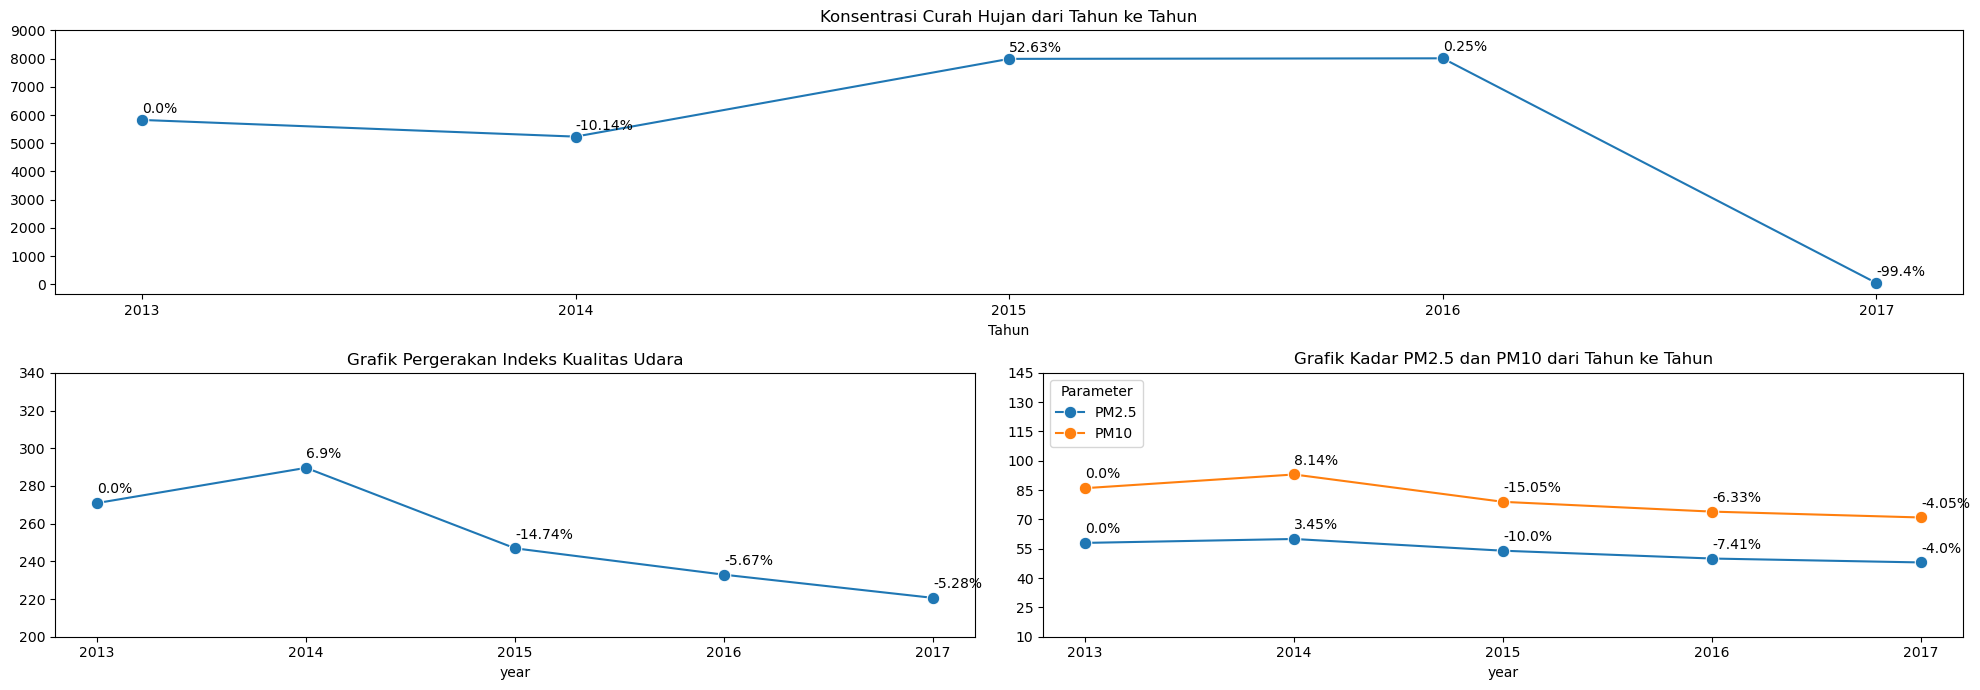

In [65]:
plt.figure(figsize=(20, 7))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1 = sns.lineplot(data=rain_by_year, x="year", y="RAIN", marker="o", markersize=9)
ax1.set_title("Konsentrasi Curah Hujan dari Tahun ke Tahun")
ax1.set_ylabel(None)
ax1.set_xlabel("Tahun")
ax1.set_xticks(rain_by_year["year"])
ax1.set_yticks(np.arange(0, 10000, 1000))

for i, txt in enumerate(rain_by_year["RAIN_pct"]):
    ax1.annotate(
        f"{txt}%",
        (rain_by_year["year"][i], rain_by_year["RAIN"][i]),
        textcoords="offset points",
        xytext=(0, 5),
    )


ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax2 = sns.lineplot(
    data=pm_rain_by_year, x="year", y="Total_AQI", marker="o", markersize=9
)
ax2.set_title("Grafik Pergerakan Indeks Kualitas Udara")
ax2.set_ylabel(None)
ax2.set_xticks(rain_by_year["year"])
ax2.set_yticks(np.arange(200, 360, 20))

for i, txt in enumerate(pm_rain_by_year["AQI_pct"]):
    ax2.annotate(
        f"{txt}%",
        (pm_rain_by_year["year"][i], pm_rain_by_year["Total_AQI"][i]),
        textcoords="offset points",
        xytext=(0, 7),
    )


ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

lst = ["PM2.5", "PM10"]
pct = ["PM2.5_pct", "PM10_pct"]

for i in range(2):
    ax3 = sns.lineplot(
        data=pm_rain_by_year, x="year", y=lst[i], label=lst[i], marker="o", markersize=9
    )

    for j, txt in enumerate(pm_rain_by_year[pct[i]]):
        ax3.annotate(
            f"{txt}%",
            (pm_rain_by_year["year"][j], pm_rain_by_year[lst[i]][j]),
            textcoords="offset points",
            xytext=(0, 7),
        )

ax3.set_ylabel(None)
ax3.set_xticks(pm_rain_by_year["year"])
ax3.set_yticks(np.arange(10, 150, 15))
ax3.legend(title="Parameter", loc="upper left")

ax3.set_title("Grafik Kadar PM2.5 dan PM10 dari Tahun ke Tahun")

plt.tight_layout()

In [66]:
print(
    f"Persentase Konsentrasi Zat PM10 Berdasarkan Curah Hujan: {np.round(pm_rain_by_year['PM10_pct'].mean(), 2)} %"
)


print(
    f"Persentase Konsentrasi Zat PM2.5 Berdasarkan Curah Hujan: {np.round(pm_rain_by_year['PM2.5_pct'].mean(), 2)} %"
)


print(
    f"Persentase Indeks Kualitas Udara Berdasarkan Curah Hujan: {np.round(pm_rain_by_year['AQI_pct'].mean(), 2)} %"
)

Persentase Konsentrasi Zat PM10 Berdasarkan Curah Hujan: -3.46 %
Persentase Konsentrasi Zat PM2.5 Berdasarkan Curah Hujan: -3.59 %
Persentase Indeks Kualitas Udara Berdasarkan Curah Hujan: -3.76 %


In [67]:
df_cleaned.head(5)

,index,year,month,day,hour,station,TEMP,PRES,DEWP,PM2.5,...,PM10_AQI,SO2_AQI,NO2_AQI,O3_AQI,CO_AQI,Total_AQI,AQI,vehicle_pollution,industrial_pollution,time_group
0,0,2013,3,1,0,Aotizhongxin,-0.7,1023.0,-18.8,4.0,...,Good,Good,Good,Moderate,Good,96.3,Moderate,15.3,88.3,Morning
1,1,2013,3,1,1,Aotizhongxin,-1.1,1023.2,-18.2,8.0,...,Good,Good,Good,Moderate,Good,104.3,Unhealthy,23.3,88.3,Morning
2,2,2013,3,1,2,Aotizhongxin,-1.1,1023.5,-18.2,7.0,...,Good,Good,Good,Moderate,Good,102.3,Unhealthy,24.3,88.3,Morning
3,3,2013,3,1,3,Aotizhongxin,-1.4,1024.5,-19.4,6.0,...,Good,Good,Good,Moderate,Good,106.3,Unhealthy,23.3,94.3,Morning
4,4,2013,3,1,4,Aotizhongxin,-2.0,1025.2,-19.5,3.0,...,Good,Good,Good,Moderate,Good,102.3,Unhealthy,18.3,96.3,Morning


#### Insights


1. Terdapat kenaikan curah hujan yang cukup signifikan dari tahun 2014 menuju 2015 dan stabil saat menuju tahun 2016.
2. Data kualitas udara tahun 2017 diambil hanya dari bulan Januari dan Februari sehingga pada grafik tren, terlihat penurunan yang cukup signifikan dikarenakan kekurangan data.
3. Konsentasi curah hujan paling tinggi berdasarkan bulan berada pada bulan Juli disusul oleh bulan Juni. Di setiap tahun, bulan Juli juga berada di urutan pertama lalu disusul oleh bulan Juni.
4. Sedangkan untuk posisi curah hujan paling rendah berada pada Januari dan Desember. Namun perlu diingat bahwa data bulan januari hanya diambil dari tahun 2014 - 2016 sehingga curah hujan yang terendah diambil alih oleh bulan Desember disusul oleh bulan Maret.


### Pertanyaan 6: Bagaimana pengaruh arah dan kecepatan angin terhadap polusi udara?


Pada pertanyaan kali ini, kita akan melihat korelasi antara kecepatan angin dan polusi udara serta bagaimana arah mata angin mempengaruhi persebaran polusi udara. Untuk itu, kita perlu mengetahui tentang arah mata angin. Berikut merupakan arah mata angin berdasarkan jenisnya:

<img src="https://awsimages.detik.net.id/community/media/visual/2021/07/13/kompas.png?w=529" alt="Kompas" width=300 height=300>

**Arah Mata Angin Ordinal:**

1. **N**: North (Utara)
2. **S**: South (Selatan)
3. **E**: East (Timur)
4. **W**: West (Barat)
5. **NW**: North-west (Barat Laut)
6. **SW**: South-west (Barat Daya)
7. **NE**: North-east (Timur Laut)
8. **SE**: South-east (Tenggara)

**Arah Mata Angin Antarkardinal Sekunder:**

1. **NNE**: North-northeast (Utara Timur Laut)
2. **ENE**: East-northeast (Timur Timur Laut)
3. **ESE**: East-southeast (Timur Tenggara)
4. **SSE**: South-southeast (Selatan Tenggara)
5. **SSW**: South-southwest (Selatan Barat Daya)
6. **WSW**: West-southwest (Barat Barat Daya)
7. **WNW**: West-northwest (Barat Barat Laut)
8. **NNW**: North-northwest (Utara Barat Laut)


Text(0.5, 1.0, 'Pengaruh Kecepatan Angin dalam Persebaran Polusi')

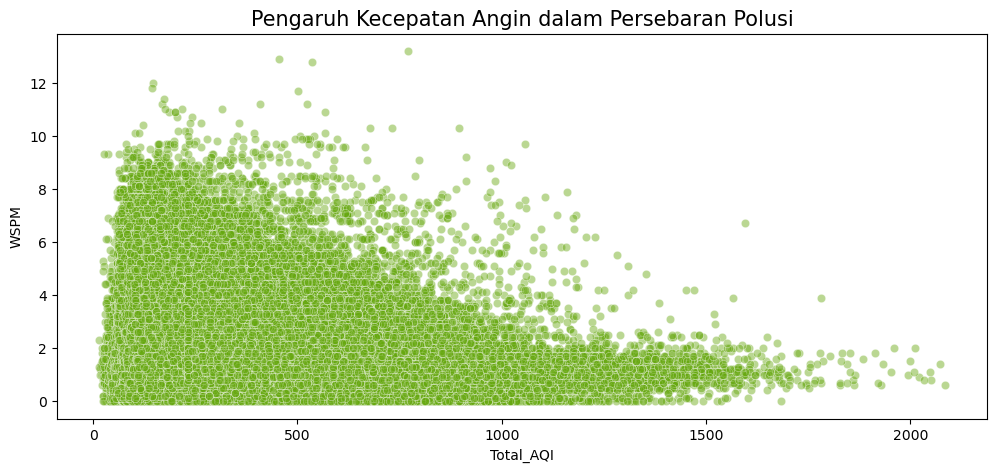

In [68]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_cleaned, x="Total_AQI", y="WSPM", alpha=0.45, color="#66a80f")
plt.title("Pengaruh Kecepatan Angin dalam Persebaran Polusi", fontsize=15)

In [69]:
pollution_by_wd = (
    df_cleaned.groupby(by="wd")
    .agg({"Total_AQI": "median", "WSPM": "median"})
    .reset_index()
)

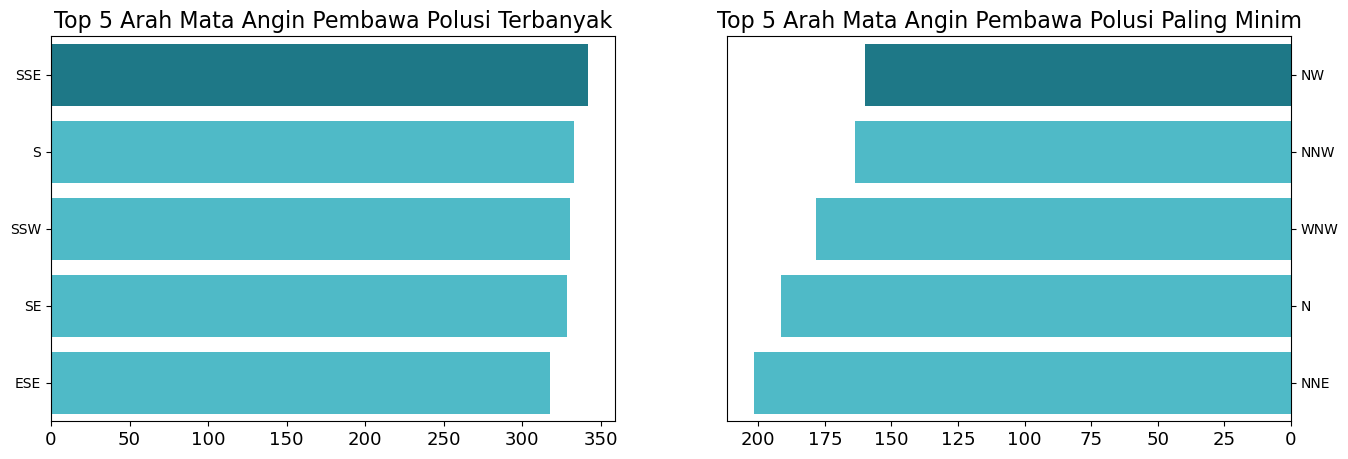

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

colors = ["#0c8599", "#3bc9db", "#3bc9db", "#3bc9db", "#3bc9db"]

sns.barplot(
    data=pollution_by_wd.sort_values("Total_AQI", ascending=False).head(5),
    y="wd",
    x="Total_AQI",
    palette=colors,
    ax=ax[0],
)
ax[0].set_title("Top 5 Arah Mata Angin Pembawa Polusi Terbanyak", fontsize=16)
ax[0].tick_params(axis="x", labelsize=13)

sns.barplot(
    data=pollution_by_wd.sort_values("Total_AQI", ascending=True).head(5),
    y="wd",
    x="Total_AQI",
    palette=colors,
    ax=ax[1],
)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Arah Mata Angin Pembawa Polusi Paling Minim", fontsize=16)
ax[1].tick_params(axis="x", labelsize=13)

for i in range(2):
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)

In [ ]:
pollution_by_wd.sort_values("Total_AQI", ascending=False)

,wd,Total_AQI,WSPM
15,WSW,284.9000,1.5
14,WNW,178.4000,1.8
13,W,240.7000,1.2
12,SW,315.9500,1.8
11,SSW,330.1130,1.7
10,SSE,341.7000,1.5
9,SE,328.6000,1.4
8,S,332.9000,1.6
7,NW,159.7968,1.9
6,NNW,163.6000,1.6


In [85]:
pollution_by_wd.sort_values("wd", ascending=False)["wd"].values

array(['WSW', 'WNW', 'W', 'SW', 'SSW', 'SSE', 'SE', 'S', 'NW', 'NNW',
       'NNE', 'NE', 'N', 'ESE', 'ENE', 'E'], dtype=object)

#### Insights


1. Kecepatan angin cukup mempengaruhi tingkat polusi udara. Dalam kasus ini, semakin besar kecepatan angin maka semakin turun juga polusi udaranya.
2. Sejauh ini, arah mata angin pembawa polusi paling minim jatuh kepada North West (NW) lalu disusul oleh North-Northwest (NNW) sedangkan arah mata angin pembawa polusi paling parah jatuh kepada South-southeast (SSE) lalu disusul oleh South (S)


### Conclusions


1. Zat PM2.5 dan PM10 merupakan zat dengan kadar yang paling tinggi di antara zat polutan lainnya bahkan masuk ke dalam kategori sangat berbahaya dan sangat tidak sehat sehingga kedua zat berperan besar dalam memperburuh polusi udara.
2. Indeks kualitas udara semua stasiun berada di sekitar 200 - 300 yang artinya masuk ke kategori **sangat tidak sehat**.
3. Malam merupakan waktu dimana konsentrasi polusi udara berada di puncak lalu disusul oleh siang dan pagi. Kadar polusi di pagi hari adalah yang terendah karena tidak banyak orang yang beraktivitas.
4. Polusi udara berada pada puncaknya pada tahun 2014 dan mengalami kenaikan sebesar 6.9%, namun mengalami penurunan sebesar 14% pada tahun 2015 dan berpotensi naik pada tahun 2017.
5. Curah hujan dapat menurunkan polusi udara sebesar 3.76%
6. Pergerakan arah angin mempengaruhi persebaran polusi udara. Polusi udara akan memburuk jika angin berhembus dari sekitar arah selatan tenggara, sedangkan polusi udara akan minim jika arah angin berhembus dari barat laut dan sekitarnya.


## Export Data


In [71]:
import datetime

In [72]:
df_cleaned["date"] = df_cleaned.apply(
    lambda row: datetime.date(row["year"], row["month"], row["day"]), axis=1
)

In [73]:
df_cleaned.to_csv("Dashboard/main-data.csv", index=False)